# Technical_analysis

In [1]:
# 이동평균선
# 볼린져밴드
# RSI
# MACD
# (stochastic)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [5]:
df = fdr.DataReader('005930', '2020','2022')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


## 변화율계산

In [6]:
df['Close']/df['Close'].shift(1)-1

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [7]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

## 원금대비 수익률

In [8]:
df['return'] = df['Change'] + 1

In [9]:
df.head()

,Open,High,Low,Close,Volume,Change,return
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921


## 누적 수익률

In [11]:
df['return'].cumprod() # 누적곱

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

## 이동평균선

In [119]:
# 단점 과거라서 후행

In [13]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [24]:
df['5ma'] = df['Close'].rolling(5).mean()
df['20ma'] = df['Close'].rolling(20).mean()
df['60ma'] = df['Close'].rolling(60).mean()
df['120ma'] = df['Close'].rolling(120).mean()

In [25]:
df

,Open,High,Low,Close,Volume,Change,return,5ma,20ma,60ma,120ma
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,55760.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.007509,1.007509,79000.0,76890.0,73046.666667,75388.333333
2021-12-27,80600,80600,79800,80200,10783368,-0.003727,0.996273,79620.0,77285.0,73148.333333,75390.000000
2021-12-28,80200,80400,79700,80300,18226325,0.001247,1.001247,80060.0,77735.0,73266.666667,75389.166667


<AxesSubplot:xlabel='Date'>

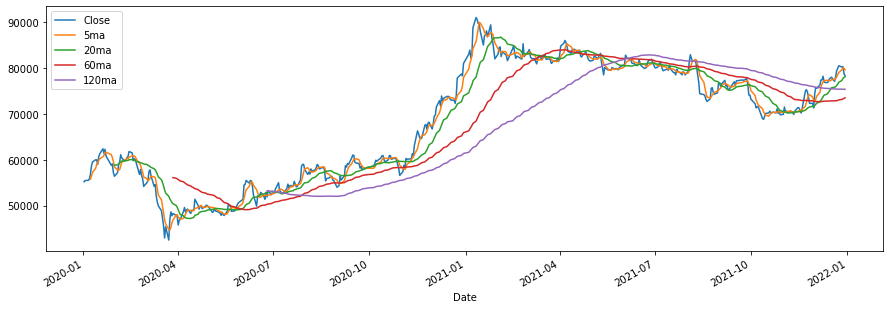

In [26]:
df[['Close','5ma','20ma','60ma','120ma']].plot(figsize=(15,5))

## 지수 이동평균선 : 현재와 가까운 값에 더 큰 가중치를 주어서 계산한 평균값

In [28]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

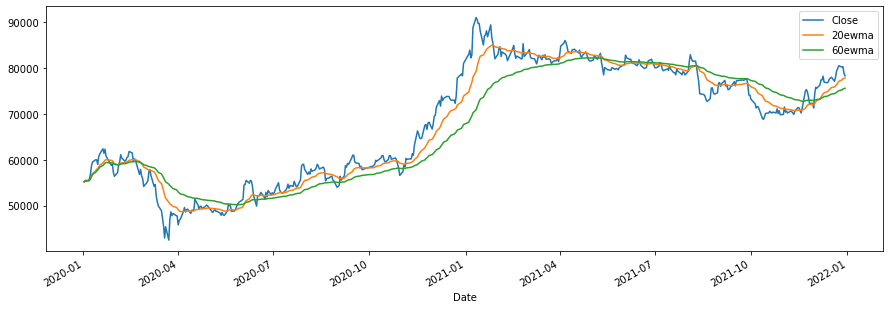

In [30]:
df[['Close','20ewma','60ewma']].plot(figsize=(15,5))

## 간격별 가격 뽑기

In [34]:
# 3일간격
df['Close'].asfreq('3D')

Date
2020-01-02    55200.0
2020-01-05        NaN
2020-01-08    56800.0
2020-01-11        NaN
2020-01-14    60000.0
               ...   
2021-12-16    77800.0
2021-12-19        NaN
2021-12-22    79400.0
2021-12-25        NaN
2021-12-28    80300.0
Freq: 3D, Name: Close, Length: 243, dtype: float64

In [35]:
# 월별
df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [36]:
# 분기별
df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [38]:
# 주별
df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64

## 볼린져밴드(boolinger band)

In [39]:
df = fdr.DataReader('005930','2020','2023')
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017
2022-04-27,65400,65500,64900,65100,10800158,-0.015129


In [40]:
df['ma20'] = df['Close'].rolling(20).mean()

In [41]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN


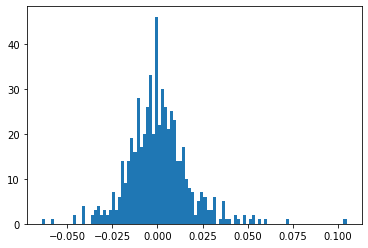

In [42]:
plt.hist(df.Change, bins=100)
plt.show()

In [ ]:
# 표준정규분포 : 평균이 0이고 표준편차가 1인 좌우대칭인 정규분포
# 표준편차: 데이터들의 평균과의 차이(편차)의 평균, 데이터가 평균에서 얼마나 떨어져 있는가
# 정규분포의 성질
1. +- 1표준편차의 범위에 68.2%의 데이터가 존재
2. +- 2표준편차의 범위에 95%의 데이터가 존재
3. +- 3준편차의 범위에 99.7%의 데이터가 존재

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         4.,  0.,  0.,  2.,  3.,  4.,  2.,  3.,  2.,  3.,  7.,  3.,  6.,
        14.,  9., 14., 19., 16., 28., 17., 20., 26., 33., 20., 46., 22.,
        30., 26., 21., 25., 23., 14., 14., 17., 10.,  8.,  7.,  2.,  5.,
         7.,  6.,  3.,  3.,  6.,  0.,  1.,  5.,  1.,  1.,  0.,  2.,  1.,
         0.,  2.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.77450378, -3.67552644, -3.5765491 , -3.47757176, -3.37859442,
        -3.27961707, -3.18063973, -3.08166239, -2.98268505, -2.88370771,
        -2.78473036, -2.68575302, -2.58677568, -2.48779834, -2.388821  ,
        -2.28984365, -2.19086631, -2.09188897, -1.99291163, -1.89393429,
        -1.79495694, -1.6959796 , -1.59700226, -1.49802492, -1.39904758,
        -1.30007023, -1.20109289, -1.10211555, -1.00313821, -0.904160

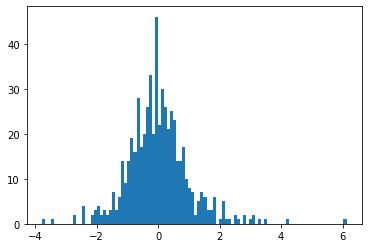

In [43]:
plt.hist((df.Change- df.Change.mean())/df.Change.std(), bins=100)

In [44]:
# 20일 표준편차
df['stdev'] = df['Close'].rolling(20).std()
df.head()

,Open,High,Low,Close,Volume,Change,ma20,stdev
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN


In [45]:
# 변동률이 정규분포와 비슷한 분포를 이루기 때문에 통계적으로 95%의 주가데이터가 존재함!
# 5%는 벗어날수 있지만 -> 그 이후엔 들어올 것이다! 라는 해석도 가능

df['upper_b'] = df['ma20'] + (df['stdev']*2)
df['lower_b'] = df['ma20'] - (df['stdev']*2)
df.head()

,Open,High,Low,Close,Volume,Change,ma20,stdev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN


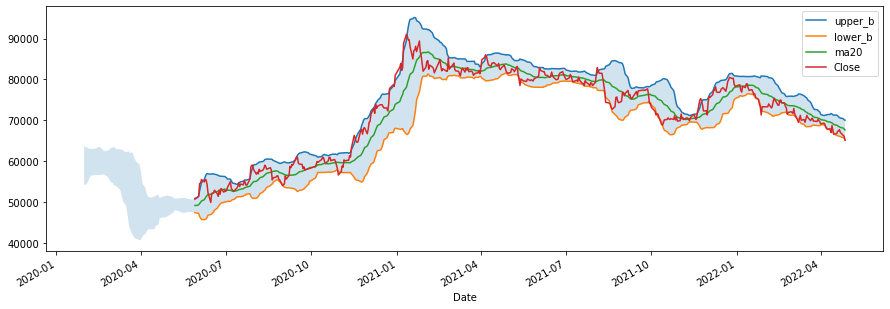

In [48]:
df[['upper_b','lower_b','ma20','Close']][100:].plot(figsize=(15,5))
plt.fill_between(df.index, df.lower_b, df.upper_b, alpha=0.2)

## 매도 매수 포지션 정해보기

In [126]:
df = fdr.DataReader('005930','2020','2023')
df['ma20'] = df['Close'].rolling(20).mean()
df['stdev'] = df['Close'].rolling(20).std()
df['upper_b'] = df['ma20'] + (df['stdev']*2)
df['lower_b'] = df['ma20'] - (df['stdev']*2)


In [127]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20,stdev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN


### 매수 : 주가가 20ma 보다 작을때

### 매도: 주가가 20ma를 dead cross

In [128]:
df['stock_pos'] = 0
# 매수
df['buy_sig'] = (df['Close'] <= df['lower_b'])
df

,Open,High,Low,Close,Volume,Change,ma20,stdev,upper_b,lower_b,stock_pos,buy_sig
Date,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN,0,False
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN,0,False
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN,0,False
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN,0,False
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758,70688.675515,66101.324485,0,False
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434,70529.318869,65980.681131,0,False
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749,70412.207498,65757.792502,0,False


In [130]:
# 전일에는 이동평균선보다 위에있고 당일에 20ma를 하회할때 
df['sell_sig'] = (df['Close'].shift(1) > df['ma20'].shift(1)) & (df['Close'] < df['ma20'])
df

,Open,High,Low,Close,Volume,Change,ma20,stdev,upper_b,lower_b,stock_pos,buy_sig,sell_sig
Date,,,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN,0,False,False
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN,0,False,False
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN,0,False,False
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN,0,False,False
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN,NaN,NaN,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758,70688.675515,66101.324485,0,False,False
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434,70529.318869,65980.681131,0,False,False
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749,70412.207498,65757.792502,0,False,False


In [ ]:
df['buy_sig'] = df['buy_sig'].apply(int)
df['sell_sig'] = df['sell_sig'].apply(int)

In [ ]:
con_df = df[(df.buy_sig == 1) | (df.sell_sig == 1)].sort_index()

In [ ]:
con_df = con_df.loc['2020-02-28':]

In [ ]:
# pd.set_option('display.max_rows', 500)

In [ ]:
# 전일에는 매수신호가 없는데 당일에 있는경우
buy_df = con_df[(con_df['buy_sig'] == 1) & (con_df['buy_sig'].shift(1) == 0)].loc['2020-08-31':'2022-02-11']
sell_df = con_df[(con_df['sell_sig'] == 1) & (con_df['sell_sig'].shift(1) ==0)].loc['2020-08-31':'2022-02-11']

In [ ]:
sell_df.Close.values - buy_df.Close.values

In [ ]:
buy_df[['Close','ma20']].reset_index()

In [ ]:
sell_df[['Close', 'ma20']].reset_index()

In [ ]:
merge_df = pd.merge(buy_df[['Close','ma20']].reset_index(), sell_df[['Close', 'ma20']].reset_index(), right_index=True, left_index=True)

In [ ]:
merge_df['margin'] = merge_df['Close_y'] - merge_df['Close_x']

In [ ]:
merge_df['return'] = (merge_df['margin']/merge_df['Close_x']) +1

In [ ]:
merge_df['cu_return'] = merge_df['return'].cumprod()

In [ ]:
merge_df

## RSI

In [65]:
# 기간=14일
# 가격이 전일보다 상승한 날의 상승분은 U
# 가격이 전일보다 하락한 경우하락분 D

# U의 평균값을 AU
# D의 평균값을 AD

# RSI = AU/ (AU+AD) : 1~0 

# 0.7 이상이면 과열
# 0.3 이하이면 침체

In [66]:
df = fdr.DataReader('005930','2020','2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [67]:
def UD(diff):
    ups = 0
    downs = 0
    
    if diff>0:
        ups =diff
    elif diff<0:
        downs = abs(diff)
    
    return pd.Series([ups, downs])
        

In [69]:
df['diff'] = df['Close'] - df['Close'].shift(1)

In [71]:
df[['up','down']] = df['diff'].apply(UD)
df

,Open,High,Low,Close,Volume,Change,diff,up,down
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.0,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,300.0,300.0,0.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1000.0,1000.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0


In [73]:
df['AU'] = df['up'].rolling(14).mean()
df['AD'] = df['down'].rolling(14).mean()

In [75]:
df.head(3)

,Open,High,Low,Close,Volume,Change,diff,up,down,AU,AD
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.0,0.0,0.0,NaN,NaN


In [77]:
df['RSI'] = df['AU']/(df['AU'] + df['AD']) 

In [79]:
df['RSI_sig'] = df['RSI'].rolling(6).mean()

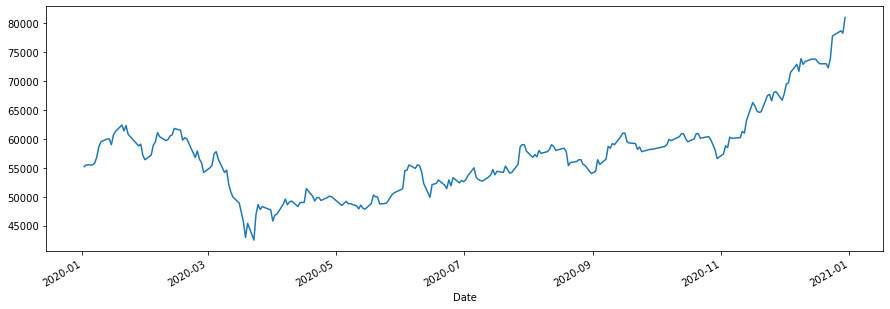

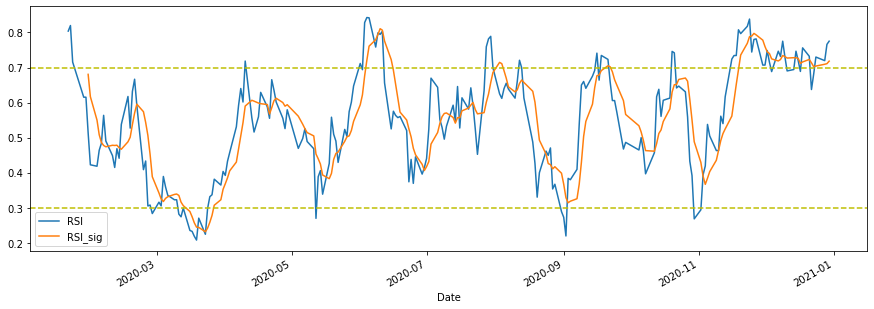

In [81]:
df['Close'].plot(figsize=(15,5))
df[['RSI', 'RSI_sig']].plot(figsize=(15,5))
plt.axhline(0.7, c='y', ls='--')
plt.axhline(0.3, c='y', ls='--')

## MACD

In [82]:
# 단기이평(12) - 장기이평(26)
# MACD signal : macd 9ma

In [104]:
df = fdr.DataReader('005930','2020','2023')
df['ma5'] = df['Close'].rolling(5).mean()
df['ma20'] = df['Close'].rolling(20).mean()
df['stdev'] = df['Close'].rolling(20).std()

df['upper_b'] = df['ma20'] + (df['stdev']*2)
df['lower_b'] = df['ma20'] - (df['stdev']*2)

df

,Open,High,Low,Close,Volume,Change,ma5,ma20,stdev,upper_b,lower_b
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN,NaN,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN,NaN,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55760.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,67140.0,68395.0,1146.837758,70688.675515,66101.324485
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,67220.0,68255.0,1137.159434,70529.318869,65980.681131
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,67140.0,68085.0,1163.603749,70412.207498,65757.792502


In [105]:
df['ema_short'] = df['Close'].ewm(12).mean() #지수 이동평균
df['ema_long'] = df['Close'].ewm(26).mean()

<AxesSubplot:xlabel='Date'>

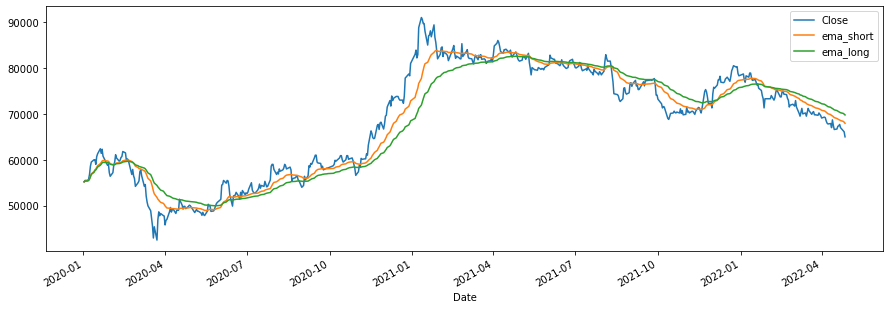

In [121]:
df[['Close','ema_short','ema_long']].plot(figsize=(15,5))

In [107]:
df['macd'] = df['ema_short']- df['ema_long']
df['macd_signal'] = df['macd'].ewm(9).mean()
df['macdhist'] = df['macd']-df['macd_signal']

In [108]:
df_macd = df[['macd','macd_signal','macdhist']].div(df['Close'],axis=0)

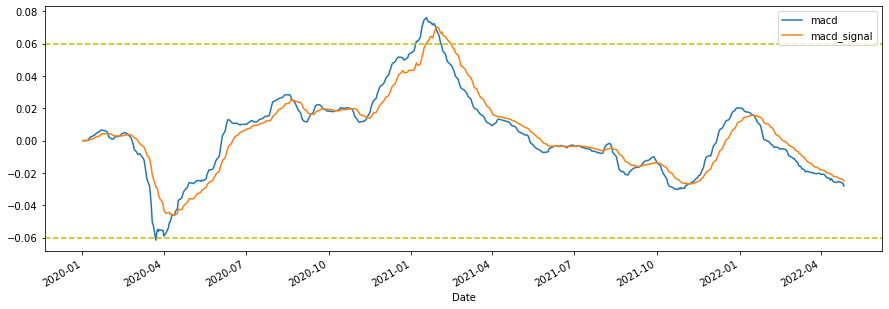

In [109]:
df_macd[['macd', 'macd_signal']].plot(figsize=(15,5))
plt.axhline(0.06, c='y', ls='--')
plt.axhline(-0.06, c='y', ls='--')

<AxesSubplot:xlabel='Date'>

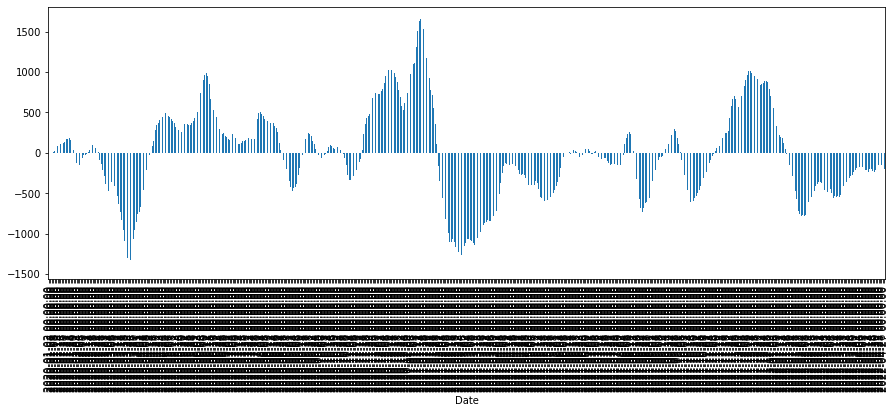

In [110]:
df['macdhist'].plot(kind='bar',figsize=(15,5))

In [111]:
df.drop(['Open','High','Low','Volume','Change'],axis=1,inplace=True)

In [112]:
df.head()

,Close,ma5,ma20,stdev,upper_b,lower_b,ema_short,ema_long,macd,macd_signal,macdhist
Date,,,,,,,,,,,
2020-01-02,55200,NaN,NaN,NaN,NaN,NaN,55200.000000,55200.000000,0.000000,0.000000,0.000000
2020-01-03,55500,NaN,NaN,NaN,NaN,NaN,55356.000000,55352.830189,3.169811,1.668322,1.501490
2020-01-06,55500,NaN,NaN,NaN,NaN,NaN,55407.889126,55403.749407,4.139719,2.580276,1.559443
2020-01-07,55800,NaN,NaN,NaN,NaN,NaN,55517.980831,55508.488552,9.492279,4.590164,4.902115
2020-01-08,56800,55760.0,NaN,NaN,NaN,NaN,55816.980100,55786.646004,30.334096,10.876685,19.457411


In [114]:
df['stock_pos'] = 0
df['buy_sig'] = (df['stock_pos'].shift(1)==0) & (df['Close']<=df['lower_b'])
df['sell_sig'] = (df['Close'].shift(1) > df['ma20'].shift(1)) & (df['Close']<df['ma20'])

In [115]:
df['buy_sig'] = df['buy_sig'].apply(int)
df['sell_sig'] = df['sell_sig'].apply(int)

In [116]:
con_df = df[(df.buy_sig==1)|(df.sell_sig==1)].sort_index()

In [117]:
con_df = con_df.loc['2020-02-28':]

In [118]:
con_df

,Close,ma5,ma20,stdev,upper_b,lower_b,ema_short,ema_long,macd,macd_signal,macdhist,pos,buy_pos,stock_pos,buy_sig,sell_sig
Date,,,,,,,,,,,,,,,,
2020-02-28,54200,56260.0,59085.0,2030.368128,63145.736257,55024.263743,58591.063261,58886.141614,-295.078353,94.767803,-389.846157,0,True,0,1,0
2020-03-12,50800,53640.0,56880.0,2980.038855,62840.077711,50919.922289,56461.402616,57459.146608,-997.743991,-362.368058,-635.375933,0,True,0,1,0
2020-03-13,49950,52330.0,56287.5,3124.852628,62537.205256,50037.794744,55951.200752,57131.363282,-1180.162530,-444.571162,-735.591368,0,True,0,1,0
2020-03-16,48900,51270.0,55657.5,3284.704385,62226.908769,49088.091231,55399.493009,56774.415240,-1374.922231,-538.039813,-836.882418,0,True,0,1,0
2020-03-17,47300,49810.0,55032.5,3626.447987,62285.395973,47779.604027,54766.599069,56366.146272,-1599.547202,-644.635542,-954.911660,0,True,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,68000,68820.0,69790.0,740.483484,71270.966967,68309.033033,70206.690251,71720.795153,-1514.104901,-1322.843296,-191.261605,0,True,0,1,0
2022-04-08,67800,68560.0,69680.0,861.210898,71402.421796,67957.578204,70021.560232,71575.580517,-1554.020285,-1345.960995,-208.059290,0,True,0,1,0
2022-04-12,67000,67840.0,69440.0,1099.952152,71639.904304,67240.095696,69638.489192,71275.023909,-1636.534717,-1396.179493,-240.355224,0,True,0,1,0
